In [ ]:
$ roslaunch hrwros_gazebo hrwros_environment.launch

In [ ]:
$ rosrun hrwros_week4 hrwros_moveit_commander_cmdline

In [ ]:
$ use <group_name>

In [ ]:
$  go <up | down | left | right | forward | backward> <distance_in_m>

In [ ]:
$ load <path_to_script_file/scrip_file_name>

# **Week 4.4: MoveIt! Commander**

 1. Start the Gazebo simulation and verify if the robot arms and the turtlebot are correctly displayed.


In [ ]:
$ roslaunch hrwros_gazebo hrwros_environment.launch

In [ ]:
#!/bin/bash
rosrun moveit_commander moveit_commander_cmdline.py /joint_states:=/combined_joint_states $*


2. MoveIt! command line tool to send motion commands to robot
arms.



In [ ]:
$ rosrun hrwros_week4 hrwros_moveit_commander_cmdline

* Useful to test/check MoveIt! configuration and robot motions.

* **`ERROR`** 

In [ ]:
$ rosrun moveit_commander moveit_commander_cmdline.py

### **1. MoveIt! Commander - basic commands**

1. List all usable commands


In [ ]:
$ help

2. Select the **`"group"`** to use


In [ ]:
$ use <group_name>

3. **Plan and execute motion** from stored positions (**`srdf`**)


In [ ]:
$ go <named_target>

4. **Plan and execute linear motions**


In [ ]:
$  go <up | down | left | right | forward | backward> <distance_in_m>

5. Get **current joint state and pose**


In [ ]:
$ current

6. Execute **multiple commands from scripts**


In [ ]:
$ load <path_to_script_file/scrip_file_name>

In [ ]:
$ help 

In [ ]:
  help                show this screen
  allow looking <true|false>       enable/disable looking around
  allow replanning <true|false>    enable/disable replanning
  constrain           clear path constraints
  constrain <name>    use the constraint <name> as a path constraint
  current             show the current state of the active group
  database            display the current database connection (if any)
  delete <name>       forget the joint values under the name <name>
  eef                 print the name of the end effector attached to the current group
  execute             execute a previously computed motion plan
  go <name>           plan and execute a motion to the state <name>
  go rand             plan and execute a motion to a random state
  go <dir> <dx>|      plan and execute a motion in direction up|down|left|right|forward|backward for distance <dx>
  ground              add a ground plane to the planning scene
  id|which            display the name of the group that is operated on
  joints              display names of the joints in the active group
  load [<file>]       load a set of interpreted commands from a file
  pick <name>         pick up object <name>
  place <name>        place object <name>
  plan <name>         plan a motion to the state <name>
  plan rand           plan a motion to a random state
  planner <name>      use planner <name> to plan next motion
  record <name>       record the current joint values under the name <name>
  rotate <x> <y> <z>  plan and execute a motion to a specified orientation (about the X,Y,Z axes)
  save [<file>]       save the currently known variables as a set of commands
  show                display the names and values of the known states
  show <name>         display the value of a state
  stop                stop the active group
  time                show the configured allowed planning time
  time <val>          set the allowed planning time
  tolerance           show the tolerance for reaching the goal region
  tolerance <val>     set the tolerance for reaching the goal region
  trace <on|off>      enable/disable replanning or looking around
  use <name>          switch to using the group named <name> (and load it if necessary)
  use|groups          show the group names that are already loaded
  vars                display the names of the known states
  wait <dt>           sleep for <dt> seconds
  x = y               assign the value of y to x
  x = [v1 v2...]      assign a vector of values to x
  x[idx] = val        assign a value to dimension idx of x


### **2. Let's see the commands in action!**


In [ ]:
$ use robot1
$ go R1Up
$ go down 0.2

* With the current command, you can see the **joint values** and **pose** of the end effector.



In [ ]:
$ current

In [ ]:
joints = [0.0 0.0 0.0 0.0 0.0 0.0]
vacuum_gripper1_suction_cup pose = [
header: 
  seq: 0
  stamp: 
    secs: 1048
    nsecs: 219000000
  frame_id: "world"
pose: 
  position: 
    x: 1.6843000000000001
    y: 2.066141
    z: 0.9616000000000003
  orientation: 
    x: -1.570092458683775e-16
    y: 0.7071067811865476
    z: 0.7071067811865475
    w: 1.5700924586837752e-16 ]
vacuum_gripper1_suction_cup RPY = [1.5707963267948968, -0.0, 3.141592653589793]

* Let's try the **load** command and **create** the required script file.



* **Create** a script and type commands outside the **`CCS`** in a regular terminal.


In [ ]:
$ touch moveit_commander_test

$ gedit moveit_commander_test

For example, you can add the following commands in the script:



In [ ]:
use robot1
go R1Up
go down 0.2

In [ ]:
use robot2
go R2Up
use robot1
go R1Up

In [ ]:
[/move_group] [ INFO] [1650637137.585521004, 2189.612000000]: robot1/robot1: Created 4 states (2 start + 2 goal)
[/move_group] [ INFO] [1650637137.585568493, 2189.612000000]: Solution found in 0.015102 seconds
[/move_group] [ INFO] [1650637137.602821971, 2189.636000000]: SimpleSetup: Path simplification took 0.017189 seconds and changed from 3 to 2 states
[/move_group] [ INFO] [1650637143.247537648, 2195.007000000]: Controller robot1/robot1_controller successfully finished
[/move_group] [ INFO] [1650637143.341245541, 2195.100000000]: Completed trajectory execution with status SUCCEEDED ...

`Terminal :` Where you started MoveIt commander and use the following command:

In [ ]:
 $ load moveit_commander_test

In [ ]:
load /home/akumar/hrwros_ws/src/hrwros/moveit_commander_test

The robot corresponding to the planning group you have used in the script should start moving now.



### **`Question 1`**

* It is actually not necessary to start the factory simulation before we start MoveIt commander to be able to move our robot arms with MoveIt.
* This is because MoveIt commander can use planning groups directly with the use command.



```
a) True

b) False
```
**`Correct: (b)`**



* The **`hrwros_environment.launch`** file loads all the relevant parameters required by the **`move_group`** ROS node such as robot_description, 
 
 * **`robot_description_semantic`** and also starts the **`move_group`** ROS node.

 * Without the **`move_group`** ROS node running, we cannot move the robot arms.

### **`Question 2`**

* We did not specify an end effector group while we set up the configuration files for MoveIt via the setup assistant. 

* But, we can still see the **`vacuum_gripper1_suction_cup`** link moving with the robot.

```
a) MoveIt internally knows that the end effector should move because we configured the vacuum_gripper1_suction_cup 
as the last link of the kinematic chain for the robot1 group.

b) The vacuum_gripper1_suction_cup is attached with a series of fixed joints to the robot1_tool0 link 
which is connected to the rest of the robot. 
Therefore, whenever the robot moves, the vacuum_gripper1_suction_cup link also moves.
```
**`Correct: (b)`**



* Yes, if you look at the **`robot_system.urdf.xacro`** file in the **`hrwros_support`** package,
 *  you can see how the different `xacro` `macros` are used to attach the **`vacuum_gripper1_suction_cup`** link to the robot arm.


* Since this connection is made via two fixed joints, the end-effector link just moves along as a result of the robot joints moving.

# **Week 4.5: Move Group interface**

*  We learn How we enter **commands in our own ROS node** using the **`MoveGroup`** Interface 

* And **create a simple pick and place pipeline.**

### **1. `MoveGroup Interface:`**



* APIs access capabilities of **`move_group`** ROS node

* **MoveIt-base** ROS applications

* Setup	a	**simple pick and place**	pipeline	in	code with **`MoveGroup`**
APIs
 * using	**ROS	action clients**.	

### **2. Conceptual overview**

* **`MoveIt`** takes care of **`trajectory execution`** (with Gazebo or hardware) 

* **`MoveGroup`** Interface **`sends these trajectories`** (`MoveIt` commander uses this implicitly)



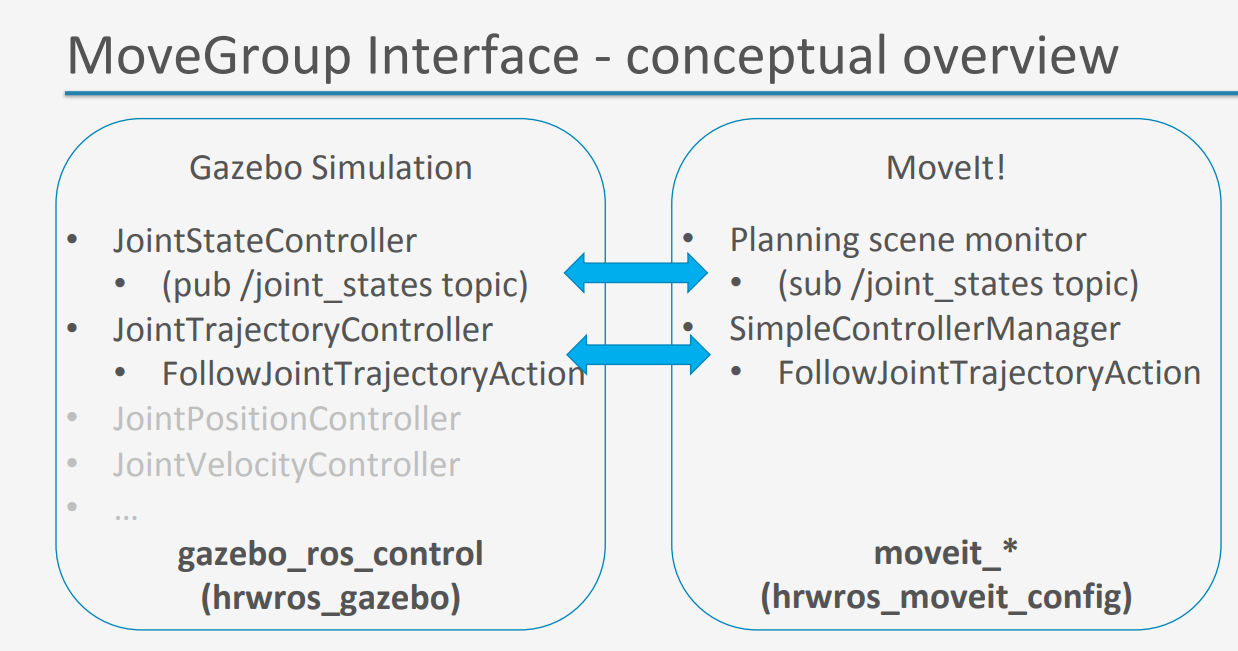

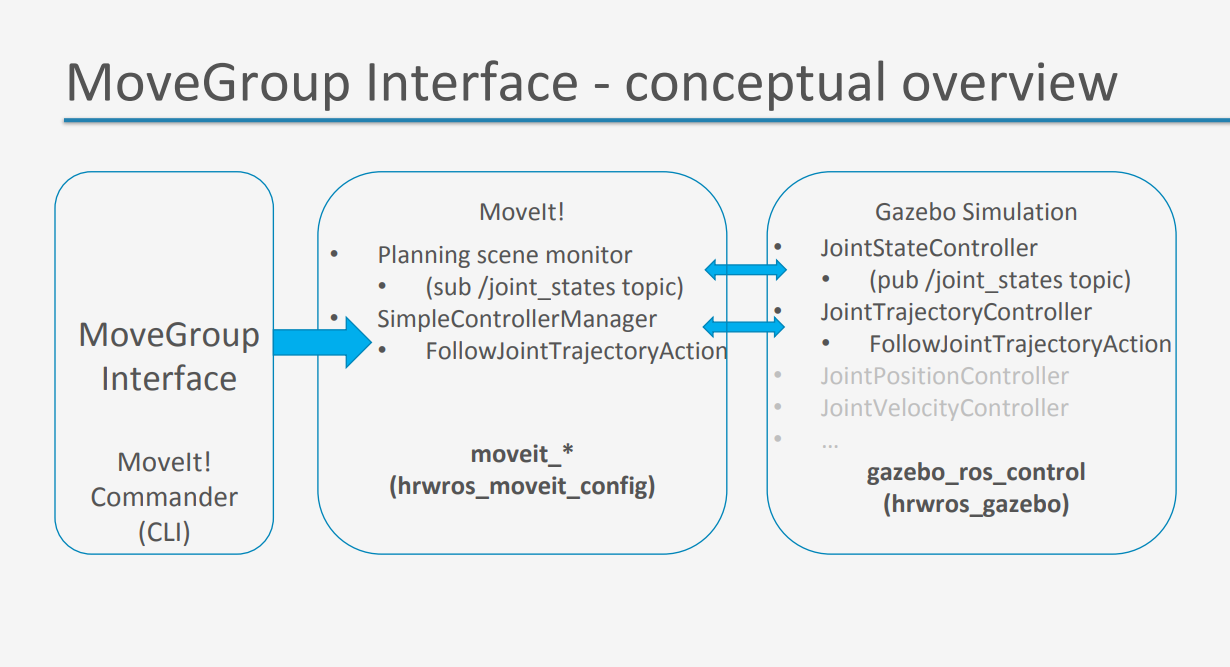

### **3.MoveGroup	Interface	-	Why?**

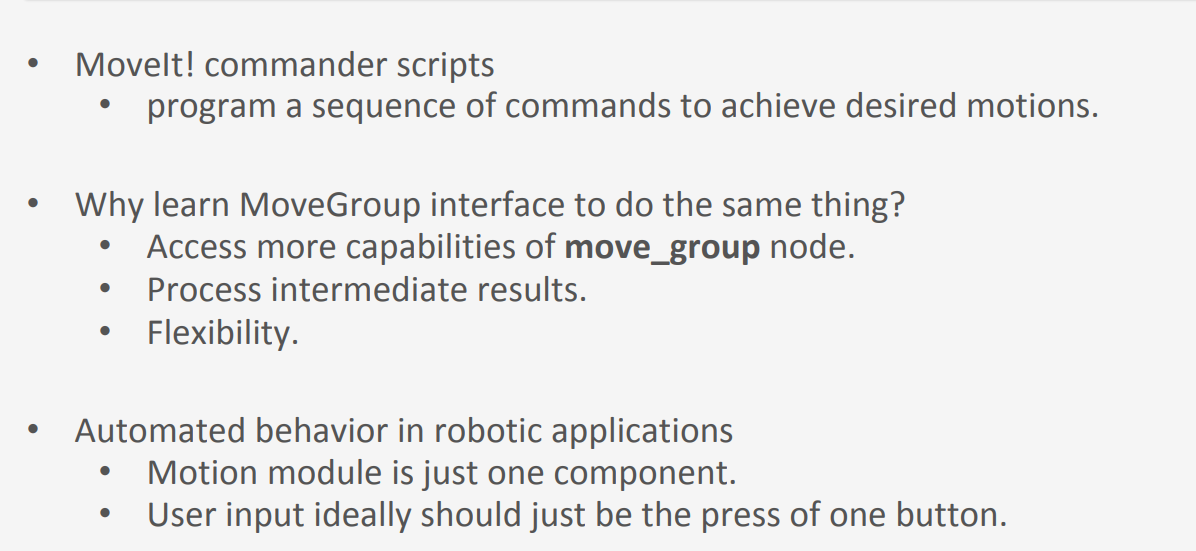

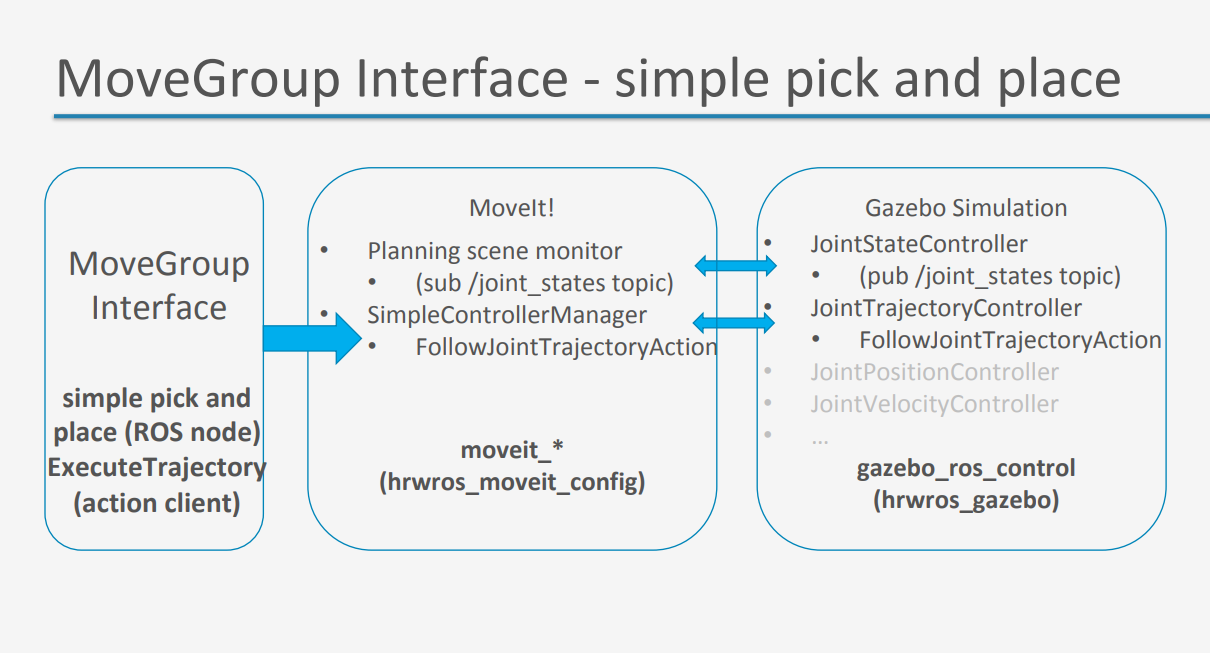

### **`Question 1`**

* **`/move_group`** is a ROS topic on which all MoveIt related information exchange happens. 

```
a) True

b) False
```
**`Correct: (b)`**

* **` /move_group`** is actually a ROS node.




* Use for checking nodes and tf 

In [ ]:
$ rosrun rqt_graph rqt_graph

In [ ]:
$ rosrun rqt_moveit rqt_moveit 

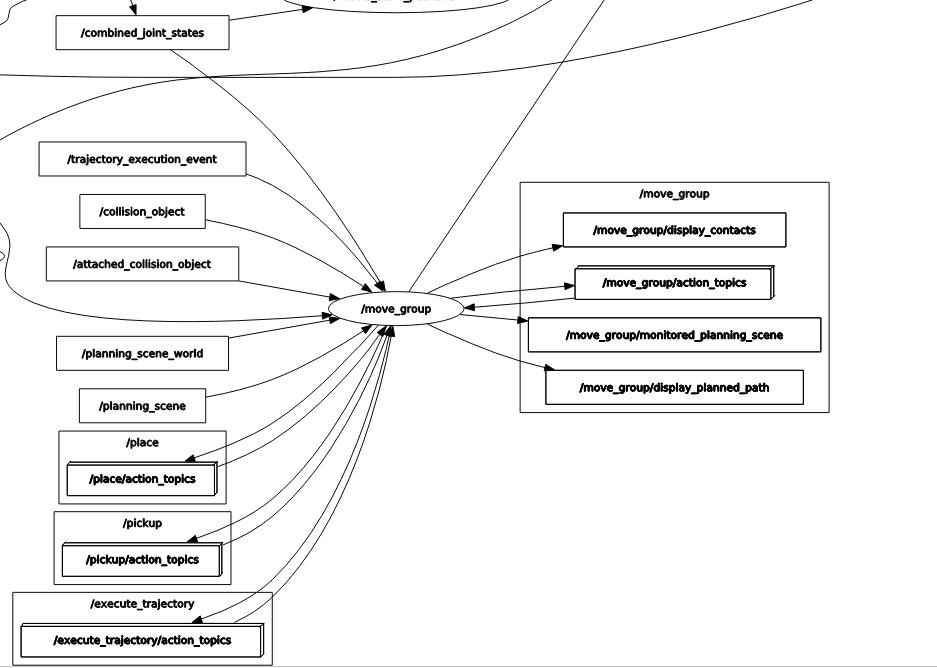

### **`Question 2`**

* **MoveIt commander command line interface**, implicitly uses the move group interface as well to access different MoveIt capabilities.

```
a) True

b) False
```
**`Correct: (a)`**





# **4.5.1 Pick & Place: Part 1**

* We will compose a simple pick and place pipeline with different MoveGroup APIs. 

* Furthermore, the purpose and function of different APIs will be explained. 


## **1. Simple pick and place pipeline** 


* **MoveGroup** Interface has a couple of different functions to interface with its API:

1. **`set_named_target`** (`<"robot joint configuration">`) - set a certain robot configuration as target

2. **`plan()`** - plans a motion to the goal

3. **`get_current_pose()`** - get pose of the end effector and joint configuration

4. **`compute_cartesian_path`** (`<waypoints>, <resolution>, <jump_threshold>, <collision_checking=True>`

### Review the the **`simple_pick_place.py`** script



The required modules related to MoveIt are:

1. **`moveit_commander`**  - Tells python we work with MoveIt

2. **`moveit_msgs.msg`**   - Loads the MoveIt specific ROS messages

3. **`actionlib`**  - For the movement with **`actionlib.SimpleActionClient()`**

5. **`geometry_msgs`**  - Loads the required messages for planning linear or cartesian spaced motions

Further in the script:

1. The **initialization** of **`moveit_commander`**, and  ROS node named **`'simple_pick_place'`**

2. **Create** move groups for each one of the robots.

3. **Instantiate** the two action clients, one for each robot, so they can use the **`execute_trajectory`** action server.

4. **Use** of the APIs from `MoveIt`

 * **`set_named_target(<"robot joint configuration">)`** - set a goal configuration
   *  (If it does not exist, you will need to create them on the assignments)
 
 * **`plan()`** - plans a motion to the goal
 
 * **`send_goal(<robot goal>)`** - sends the goal to the action server



In [ ]:
#!/usr/bin/env python3

# Software License Agreement (BSD License)
#
# Author: Acorn Pooley
# Modified by: Mukunda Bharatheesha
#
# To use the python interface to move_group, import the moveit_commander
# module.  We also import rospy and some messages that we will use.
import sys
import copy
import rospy
import moveit_commander
import moveit_msgs.msg
import actionlib
import geometry_msgs


def simple_pick_place():
    # 1. First initialize moveit_commander and rospy.
    moveit_commander.roscpp_initialize(sys.argv)
    rospy.init_node('simple_pick_place',
                    anonymous=True)

    # 2. Instantiate a MoveGroupCommander object. 
    # This object is an interface to one group of joints.  
    # In this case the group refers to the joints of robot1.
    # This interface can be used to plan and execute motions on robot1.
    robot1_group = moveit_commander.MoveGroupCommander("robot1")

    # MoveGroup Commander Object for robot2.
    # We're not using it so let's leave it commented out
    # robot2_group = moveit_commander.MoveGroupCommander("robot2")

    # 3. Action clients to the ExecuteTrajectory action server.
    robot1_client = actionlib.SimpleActionClient('execute_trajectory',
        moveit_msgs.msg.ExecuteTrajectoryAction)
    robot1_client.wait_for_server()

    ropy.loginfo('Execute Trajectory server is available for robot1')
    robot2_client = actionlib.SimpleActionClient('execute_trajectory',
        moveit_msgs.msg.ExecuteTrajectoryAction)

    robot2_client.wait_for_server()
    rospy.loginfo('Execute Trajectory server is available for robot2')

    # 4.1 Set a named joint configuration as the goal to plan for a move group.
    # Named joint configurations are the robot poses
    # defined via MoveIt! Setup Assistant.
    robot1_group.set_named_target("R1Home")

    # 4.2 Plan to the desired joint-space goal
    # using the default planner (RRTConnect).
    # Gets only the plan, and discards the other elements returned by plan()
    _, plan, _, _ = robot1_group.plan()

    # 5. Create a goal message object for the action server.
    robot1_goal = moveit_msgs.msg.ExecuteTrajectoryGoal()

    # 6.. Update the trajectory in the goal message.
    robot1_goal.trajectory = plan

    # 4.3. Send the goal to the action server.
    robot1_client.send_goal(robot1_goal)
    robot1_client.wait_for_result()

    robot1_group.set_named_target("R1PreGrasp")

    _, plan, _, _ = robot1_group.plan()
    robot1_goal = moveit_msgs.msg.ExecuteTrajectoryGoal()
    robot1_goal.trajectory = plan

    robot1_client.send_goal(robot1_goal)
    robot1_client.wait_for_result()

    # 4.4. Cartesian Paths
    # 
    # You can plan a cartesian path directly by specifying a list of waypoints
    # for the end-effector to go through.
    waypoints = []
    # start with the current pose
    current_pose = robot1_group.get_current_pose()
    rospy.sleep(0.5)
    current_pose = robot1_group.get_current_pose()

    # 7. create linear offsets to the current pose
    new_eef_pose = geometry_msgs.msg.Pose()

    # 8. Manual offsets because we don't have a camera to detect objects yet.
    new_eef_pose.position.x = current_pose.pose.position.x + 0.10
    new_eef_pose.position.y = current_pose.pose.position.y - 0.20
    new_eef_pose.position.z = current_pose.pose.position.z - 0.20

    # 9. Retain orientation of the current pose.
    new_eef_pose.orientation = copy.deepcopy(current_pose.pose.orientation)

    waypoints.append(new_eef_pose)
    waypoints.append(current_pose.pose)

    # 10. We want the cartesian path to be interpolated at a resolution of 1 cm
    # which is why we will specify 0.01 as the eef_step in cartesian translation.  

    # We will specify the jump threshold as 0.0, effectively
    # disabling it.
    fraction = 0.0
    for count_cartesian_path in range(0, 3):
        if fraction < 1.0:
            (plan_cartesian, fraction) = robot1_group.compute_cartesian_path(
                                                    waypoints,
                                                    0.01,     # eef_step
                                                    0.0)      # jump_threshold
        else:
            break

    robot1_goal = moveit_msgs.msg.ExecuteTrajectoryGoal()
    robot1_goal.trajectory = plan_cartesian

    robot1_client.send_goal(robot1_goal)
    robot1_client.wait_for_result()

    robot1_group.set_named_target("R1Place")

    _, plan, _, _ = robot1_group.plan()
    robot1_goal = moveit_msgs.msg.ExecuteTrajectoryGoal()
    robot1_goal.trajectory = plan

    robot1_client.send_goal(robot1_goal)
    robot1_client.wait_for_result()

    # 11. When finished shut down moveit_commander.
    moveit_commander.roscpp_shutdown()


if __name__ == '__main__':
    try:
        simple_pick_place()
    except rospy.ROSInterruptException:
        pass


In [ ]:
  <exec_depend>actionlib</exec_depend>
  <exec_depend>geometry_msgs</exec_depend>
  <exec_depend>moveit_msgs</exec_depend>

* Since this API works via actions, 
 * we can start computing the next trajectory while the robot is still executing the current one.

In [ ]:
$ rosmsg show moveit_msgs/ExecuteTrajectoryGoal 



``` 
moveit_msgs/RobotTrajectory trajectory
  trajectory_msgs/JointTrajectory joint_trajectory
    std_msgs/Header header
      uint32 seq
      time stamp
      string frame_id
    string[] joint_names
    trajectory_msgs/JointTrajectoryPoint[] points
      float64[] positions
      float64[] velocities
      float64[] accelerations
      float64[] effort
      duration time_from_start
  trajectory_msgs/MultiDOFJointTrajectory multi_dof_joint_trajectory
    std_msgs/Header header
      uint32 seq
      time stamp
      string frame_id
    string[] joint_names
    trajectory_msgs/MultiDOFJointTrajectoryPoint[] points
      geometry_msgs/Transform[] transforms
        geometry_msgs/Vector3 translation
          float64 x y z 
        geometry_msgs/Quaternion rotation
          float64 x y z 
          float64 w
          
      geometry_msgs/Twist[] velocities
        geometry_msgs/Vector3 linear
          float64 x y z 
            geometry_msgs/Vector3 angular
               float64 x y z 

      geometry_msgs/Twist[] accelerations
        geometry_msgs/Vector3 linear
          float64 x y z 
        geometry_msgs/Vector3 angular
          float64 x y z 
      duration time_from_start

```



In [ ]:
moveit_msgs/ExecuteTrajectoryAction          moveit_msgs/ExecuteTrajectoryActionGoal      moveit_msgs/ExecuteTrajectoryFeedback      
moveit_msgs/ExecuteTrajectoryResult          moveit_msgs/ExecuteTrajectoryActionFeedback 
 moveit_msgs/ExecuteTrajectoryActionResult   moveit_msgs/ExecuteTrajectoryGoal  

In [ ]:
    
    # 4.3. Send the goal to the action server.
    robot1_client.send_goal(robot1_goal)
    # Change made here 
    # robot1_client.wait_for_result()


    robot1_group.set_named_target("R1PreGrasp")

    _, plan, _, _ = robot1_group.plan()
    robot1_goal = moveit_msgs.msg.ExecuteTrajectoryGoal()
    robot1_goal.trajectory = plan

    robot1_client.send_goal(robot1_goal)
    robot1_client.wait_for_result()

In [ ]:
  # You can plan a cartesian path directly by specifying a list of waypoints
    # for the end-effector to go through.
    waypoints = []
    # start with the current pose
    current_pose = robot1_group.get_current_pose()
    # sleep , if you have delay in system response 
    rospy.sleep(0.5)
    current_pose = robot1_group.get_current_pose()

### **`Question 1`**

* The **`set_named_target`** API accepts robot poses specifed using the **`geometry_msgs/Pose message`** type as argument.

```
a) True

b) False
```
**`Correct: (b)`**

* Yes, we have to specify a string which corresponds to the name of the **Robot pose** we defined in the **moveit setup assistant**.




# **4.5.2 Pick & Place: Part 2**

* We will continue with composing a simple pick and place pipeline with different MoveGroup APIs.


 **Testing our pick and place pipeline:**

**` Step1:`**  Start the factory simulation.




In [ ]:
$ roslaunch hrwros_gazebo hrwros_environment.launch

**`Step 2:`** Source our setup files.


In [ ]:
$ source $HOME/hrwros_ws/devel/setup.bash
$ roscd hrwros_week4/scripts/

**`Step 3:`** Uncomment the following function in `.../hrwros_week4/scripts/` 
* **`simple_pick_place.py (#L84):`** 


In [ ]:
    
    # 4.3. Send the goal to the action server.
    robot1_client.send_goal(robot1_goal)
    # Change made here 
    # robot1_client.wait_for_result()

    robot1_group.set_named_target("R1PreGrasp")

**`Step 4:`** Launch the node


In [ ]:
$ roslaunch hrwros_week4 hrwros_simple_pick_place.launch

Now let's test the non-blocking execution. Open up `.../hrwros_week4/scripts/`

* **`simple_pick_place.py:`**

Remove the following function and relaunch the program `(#L84)`.


In [ ]:
robot1_client.wait_for_result()

### **Results of first robot:**

*  Preemption of the first goal

* Only the second was executed



### **Results second robot:**

* Two separate clients which send information to the same server

* Blocking



### **Waypoints:**

* Poses of robot end effector

* Timing synchronisation results in an incorrect pose

 *  Issues with `get_current_pose() API`
 * Fixed with delay



In [ ]:
current_pose = robot1_group.get_current_pose()
rospy.sleep(0.5)
current_pose = robot1_group.get_current_pose()

1. **Waypoints** should only consist of pose messages 

2. **Linear offsets** with **`geometry_msgs.msg.Pose()`**.

In [ ]:
$ rosmsg show geometry_msgs/PoseStamped 

std_msgs/Header header
  uint32 seq
  time stamp
  string frame_id
geometry_msgs/Pose pose
  geometry_msgs/Point position
    float64 x
    float64 y
    float64 z
  geometry_msgs/Quaternion orientation
    float64 x
    float64 y
    float64 z
    float64 w

In [ ]:
 # create linear offsets to the current pose
    new_eef_pose = geometry_msgs.msg.Pose()

 # Manual offsets because we don't have a camera to detect objects yet.
    new_eef_pose.position.x = current_pose.pose.position.x + 0.10
    new_eef_pose.position.y = current_pose.pose.position.y - 0.20
    new_eef_pose.position.z = current_pose.pose.position.z - 0.20

In [ ]:
   # Retain orientation of the current pose.
    new_eef_pose.orientation = copy.deepcopy(current_pose.pose.orientation)

Pose stamped messages consists of timing and reference frame information along with the pose message type.

The extraction of the pose message can be done as following: 
**`current_pose.pose.position.x +0.10`**

Finally, we can add the newly created waypoint and the current pose. 



### **`Question 1`**

* We tried testing the non-blocking functionality by sending two goals one after the other from **`robot1_client`**. 

* And we were told that this would also not work if we send a goal at the same time using the **`robot2_client`** for the second robot.

*  What will actually happen if we do so assuming the planning is always successful?

```
a) Robot1 will start moving and stop when the second goal is sent by robot2 to the same execute_trajectory action server. 
The second robot will complete executing the trajectory towards the specified named target,
 if we wait for the result of execution.

b) Both Robots will reach their respective goals.
```
**`Correct: (a)`**

* Yes, this is the expected behavior as the trajectory goal to **`Robot1`** gets pre-empted by the trajectory goal to **`Robot2`**.



### **`Question 2`**

* The waypoints to generate linear motion paths for the end-effector of the robot arms are a list of elements with **`geometry_msgs/PoseStamped`** message type.

```
a) True

b) False
```
**`Correct: (b)`**

* The waypoints list consists of elements of the **`geometry_msgs/Pose`** message type.




# **4.5.3 Pick & Place: Part 3**

* We will finish the build of a simple pick and place pipeline with different **`MoveGroup`** APIs.




In [ ]:
robot1_group.compute_cartesian_path()

* This API also checks for collisions in the trajectory.

*  What is important to remember is, that this API already considers the current
pose of the robot end effector as the starting waypoint. 

In [ ]:
 # We want the cartesian path to be interpolated at a resolution of 1 cm
 # which is why we will specify 0.01 as the eef_step in cartesian translation.  
 
 # We will specify the jump threshold as 0.0, effectively disabling it.

    fraction = 0.0
    for count_cartesian_path in range(0, 3):
        if fraction < 1.0:
            (plan_cartesian, fraction) = robot1_group.compute_cartesian_path(
                                                    waypoints,
                                                    0.01,     # eef_step
                                                    0.0)      # jump_threshold
        else:
            break

In [ ]:
$ roslaunch hrwros_gazebo hrwros_environment.launch

In [ ]:
$ roslaunch hrwros_week4 hrwros_simple_pick_place.launch

In [ ]:
$ rosrun hrwros_week4 hrwros_moveit_commander_cmdline

In [ ]:
<?xml version="1.0"?>
<launch>
  <!-- Start the move it commander with the remap to /combined_joint_states -->
  <node name="hrwros_simple_pick_place" pkg="hrwros_week4" type="simple_pick_place.py" output="screen">
    <remap from="/joint_states" to="/combined_joint_states"/>
  </node>
</launch>

# **5. Multiple Choice Questions**


### **`Question 1`**

* In the **Self-collision** entity, the `"Sampling density"` sliding bar is adjusted to a value of `90000`. 

* What does this number indicate?

 **Ans :** The number of random joint values generated by the MoveIt Setup 
 * Assistant for all movable joints in the **`URDF/XACRO`** to check for potential collisions with other links in the **`URDF/XACRO`**.

 *  Not all joints defined in the URDF cause collisions. Some joints are configured to only hold a link in a certain position permanently.




